In [1]:
from pathlib import Path
import sys
import matplotlib.pyplot as plt
from tqdm.notebook import trange, tqdm


%load_ext autoreload
%autoreload 2

# TO CHANGE
# absolute path to ACCAL/ACCAL folder
appPath = Path(r"D:\Stage\ACCAL\ACCAL")
sys.path.append(str(appPath))

#Kernel module
import numpy as np
import modules.features.kernel
import modules.features.selection
import scipy.sparse


# Path to data 
dataFolderPath = Path(r"D:\Stage\ACCAL\data\dataTest1","temp","processedImages")



In [2]:
K = modules.features.kernel.getK(l=4.0,absAppPath=appPath ,pixelSide=360)

In [3]:
pathList = list(dataFolderPath.glob("*.npy"))
img = np.load(pathList[0])
imgVec = img.ravel().reshape(-1,1)

In [4]:
K2 = K.power(2)
T = K2.transpose()
traceVec = T.dot(imgVec.reshape(-1,1))

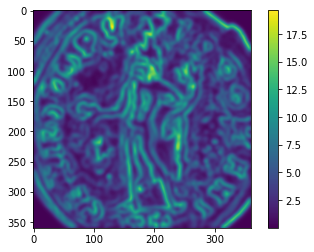

In [5]:
plt.imshow(traceVec.reshape(360,360))
plt.colorbar()

In [5]:
## fonction qui récupère une colonne

def getKwColumn(K:scipy.sparse.csr_matrix,imgVec:np.ndarray,column:int)->scipy.sparse.csr_matrix:
    KD = K[:,column].multiply(imgVec.reshape(-1,1))
    return K.transpose().dot(KD)



In [67]:
nbFeatures = 250


featuresList = []

varVec = 0
psi = 0


for i in trange(nbFeatures):
    if i == 0 :
        ## First feature
        idxMax = np.argmax(imgVec)
        featuresList.append(idxMax)
        
        
        col = getKwColumn(K,imgVec,idxMax)
        psi = scipy.sparse.csr_matrix(col)
        
        
        varXsi = traceVec[featuresList].ravel()
        invVarXsi = 1/varXsi
        invVarXsiDiag = scipy.sparse.diags(invVarXsi)
        
        
        varVec = scipy.sparse.csc_matrix(traceVec) - psi.power(2).dot(invVarXsi.reshape(-1,1)).reshape(-1,1)
        
    else: 
        idxMax = np.argmax(varVec)
        featuresList.append(idxMax)
        
        
        col = getKwColumn(K,imgVec,idxMax)
        psi = scipy.sparse.hstack([psi,col])
        
        
        
        varXsi = traceVec[featuresList].ravel()
        invVarXsi = 1/varXsi
        #invVarXsiDiag = scipy.sparse.diags(invVarXsi)
        
        
        varVec = scipy.sparse.csc_matrix(traceVec) - psi.power(2).dot(invVarXsi.reshape(-1,1)).reshape(-1,1)

        

        
        



  0%|          | 0/250 [00:00<?, ?it/s]

In [23]:
def getFeatures(nbFeatures:int,K,imgPath:str):
    
    img = np.load(imgPath)
    imgVec = img.ravel().reshape(-1,1)
    
    K2 = K.power(2)
    T = K2.transpose()
    traceVec = T.dot(imgVec.reshape(-1,1))
    
    ## Initial values
    featuresList = []
    varVec = 0
    psi = 0


    for i in range(nbFeatures):
        # first feature
        if i == 0 :
            ## First feature
            idxMax = np.argmax(imgVec)
            featuresList.append(idxMax)


            col = getKwColumn(K,imgVec,idxMax)
            psi = scipy.sparse.csr_matrix(col)


            varXsi = traceVec[featuresList].ravel()
            invVarXsi = 1/varXsi
            invVarXsiDiag = scipy.sparse.diags(invVarXsi)


            varVec = scipy.sparse.csc_matrix(traceVec) - psi.power(2).dot(invVarXsi.reshape(-1,1)).reshape(-1,1)

        else: 
            idxMax = np.argmax(varVec)
            featuresList.append(idxMax)
            
            col = getKwColumn(K,imgVec,idxMax)
            psi = scipy.sparse.hstack([psi,col])

            varXsi = traceVec[featuresList].ravel()
            invVarXsi = 1/varXsi
            varVec = scipy.sparse.csc_matrix(traceVec) - psi.power(2).dot(invVarXsi.reshape(-1,1)).reshape(-1,1)
            
    # end of the loop 
    return featuresList

        
    
    
    

In [7]:
featureList = getFeatures(250,K,imgVec)

In [8]:
print(featureList)

[8408, 14593, 80879, 34756, 39792, 36612, 45624, 9678, 75480, 4805, 16908, 25003, 78589, 21234, 106376, 124530, 45757, 10931, 45167, 35704, 2812, 12220, 21061, 3453, 112121, 105334, 121300, 7148, 38001, 13441, 25644, 128117, 94839, 35242, 117709, 116504, 10051, 128003, 83688, 95642, 45734, 32223, 27425, 17008, 110018, 62318, 73096, 115803, 101360, 90517, 54519, 10276, 42514, 109400, 117162, 62803, 22851, 4980, 87359, 87948, 8755, 122603, 104200, 17466, 55263, 40498, 73834, 33374, 127295, 101730, 118903, 108796, 5981, 108161, 37681, 94154, 114475, 91681, 57407, 50199, 120050, 125833, 25048, 6987, 49827, 67921, 72594, 51724, 43246, 99241, 98621, 38217, 22033, 52789, 13865, 60273, 113260, 15359, 123293, 41044, 31170, 6672, 29347, 60510, 16329, 61652, 58456, 40885, 56050, 98439, 30552, 13386, 82594, 86223, 29235, 36179, 32108, 91252, 80634, 70414, 81762, 81537, 35186, 114941, 53259, 58866, 52008, 11371, 1005, 105774, 56258, 83758, 126181, 83986, 56039, 37028, 37602, 115434, 97756, 27987, 1

In [68]:
varVec[varVec<0]=0


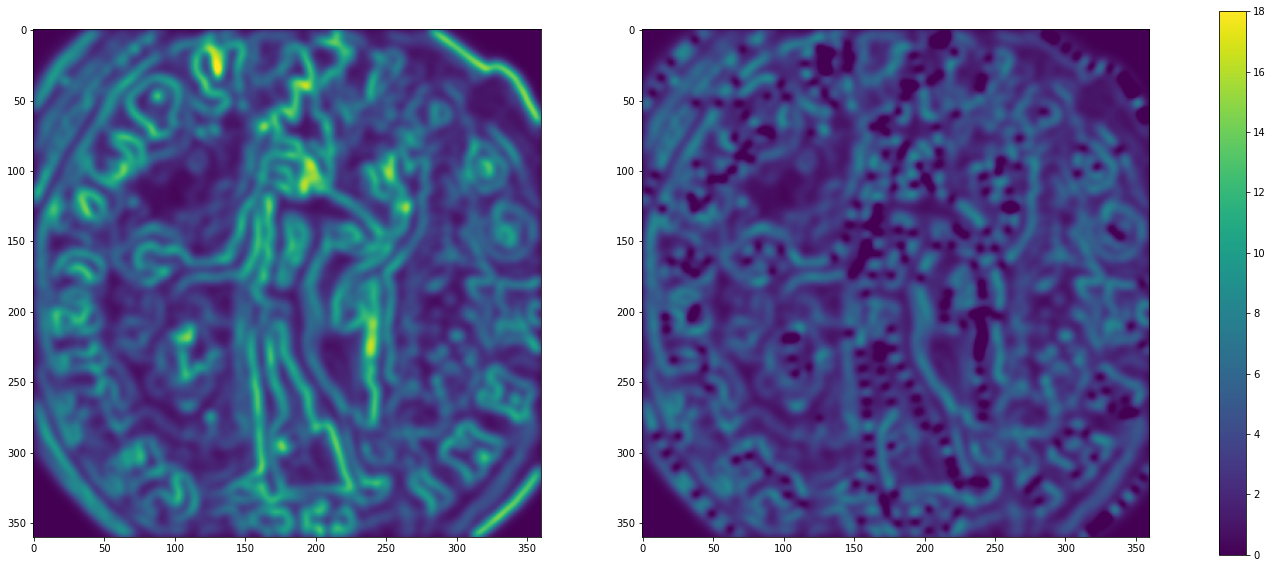

In [69]:
fig, axes = plt.subplots(1,2,figsize=(25,10))
ax1,ax2 = axes

im = ax1.imshow(traceVec.reshape(360,360),vmin=0,vmax=18)
im = ax2.imshow(varVec.reshape(360,360),vmin=0,vmax=18)

fig.colorbar(im, ax=axes.ravel().tolist())

In [21]:
## Get next 
idxMax = np.argmax(imgVec)
col = getKwColumn(K,imgVec,idxMax)


### update FeatureList
featuresList = []
featuresList.append(idxMax)


### update psi 

psi = scipy.sparse.csr_matrix(col)


#varXsi = self.varVectBase[self.featuresList]

varXsi = traceVec[featuresList].ravel()

invVarXsi = 1/varXsi
invVarXsiDiag = scipy.sparse.diags(invVarXsi)

#self.varVect = s.csc_matrix(self.varVectBase) - (self.psi.dot(invVarXsiDiag).dot(self.psi.transpose())).diagonal()


varVec = scipy.sparse.csc_matrix(traceVec) - (psi.dot(invVarXsiDiag).dot(psi.transpose())).diagonal().reshape(-1,1)

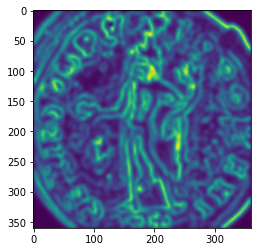

In [23]:
plt.imshow(varVec.reshape(360,360))

In [ ]:
getFeatures(250,K,imgVec)

In [4]:
from multiprocessing import Pool
import time
import func
import numpy as np

from multiprocessing import shared_memory


In [5]:
argument = pathList[:4]

In [12]:
argument

[WindowsPath('D:/Stage/ACCAL/data/dataTest1/temp/processedImages/101 Revers.npy'),
 WindowsPath('D:/Stage/ACCAL/data/dataTest1/temp/processedImages/10104 Revers.npy'),
 WindowsPath('D:/Stage/ACCAL/data/dataTest1/temp/processedImages/10232 Revers.npy'),
 WindowsPath('D:/Stage/ACCAL/data/dataTest1/temp/processedImages/10612 Revers.npy')]

In [13]:
# creation de la mémoire partagée 
shmData = shared_memory.SharedMemory(create=True,size=K.data.nbytes)
shmIndices = shared_memory.SharedMemory(create=True,size=K.indices.nbytes)
shmIndptr = shared_memory.SharedMemory(create=True,size=K.indptr.nbytes)


## associe les nouvelles array aux 
data = np.ndarray(K.data.shape,dtype=K.data.dtype,buffer = shmData.buf)
indices = np.ndarray(K.indices.shape,dtype=K.indices.dtype,buffer = shmIndices.buf)
indptr = np.ndarray(K.indptr.shape,dtype=K.indptr.dtype,buffer = shmIndptr.buf)

##copie dans la mémoire
data[:] = K.data[:]
indices[:] = K.indices[:]
indptr[:] = K.indptr[:]


In [14]:
sharedMem = [[K.data.shape,K.data.dtype,shmData.name],
             [K.indices.shape,K.indices.dtype,shmIndices.name],
             [K.indptr.shape,K.indptr.dtype,shmIndptr.name]]



In [15]:
#Pool of 4 workers (4 cores)
pool = Pool(4)
processes = [pool.apply_async(func.getFeatures, args=(250,sharedMem,K.shape,path)) for path in argument]
result = [p.get() for p in processes]


In [16]:
pool.close()

In [17]:
for sm in [shmData,shmIndices,shmIndptr]:
    sm.close()
    sm.unlink()

In [41]:
K.data

array([1.       , 0.9692332, 0.8824969, ..., 0.8824969, 0.9692332,
       1.       ], dtype=float32)

NameError: name 'sps' is not defined

In [ ]:

shmData = shared_memory.SharedMemory(create=True,size=K.data.nbytes)
shmIndices = shared_memory.SharedMemory(create=True,size=K.indices.nbytes)
shmIndptr = shared_memory.SharedMemory(create=True,size=K.indptr.nbytes)

In [ ]:
sharedMem = [[K.data.shape,K.data.dtype,shmData.name],[K.indices.shape,K.indices.dtype,shmIndices.name],[K.indptr.shape,K.indptr.dtype,shmIndptr.name]]

In [20]:
import modules.features.selection 

In [22]:
K = modules.features.kernel.getK(l=4.0,absAppPath=appPath ,pixelSide=360)
pathList = list(dataFolderPath.glob("*.npy"))

In [24]:
featuresList = modules.features.selection.getFeatures(250,K,pathList[0])

In [34]:
np.save(Path(pathList[0].parent,pathList[0].stem+"F"),np.array(featuresList))

In [33]:
Path(pathList[0].parent,pathList[0].stem+"F")

WindowsPath('D:/Stage/ACCAL/data/dataTest1/temp/processedImages/101 Revers')

In [25]:
featuresList

[8408,
 14593,
 80879,
 34756,
 39792,
 36612,
 45624,
 9678,
 75480,
 4805,
 16908,
 25003,
 78589,
 21234,
 106376,
 124530,
 45757,
 10931,
 45167,
 35704,
 2812,
 12220,
 21061,
 3453,
 112121,
 105334,
 121300,
 7148,
 38001,
 13441,
 25644,
 128117,
 94839,
 35242,
 117709,
 116504,
 10051,
 128003,
 83688,
 95642,
 45734,
 32223,
 27425,
 17008,
 110018,
 62318,
 73096,
 115803,
 101360,
 90517,
 54519,
 10276,
 42514,
 109400,
 117162,
 62803,
 22851,
 4980,
 87359,
 87948,
 8755,
 122603,
 104200,
 17466,
 55263,
 40498,
 73834,
 33374,
 127295,
 101730,
 118903,
 108796,
 5981,
 108161,
 37681,
 94154,
 114475,
 91681,
 57407,
 50199,
 120050,
 125833,
 25048,
 6987,
 49827,
 67921,
 72594,
 51724,
 43246,
 99241,
 98621,
 38217,
 22033,
 52789,
 13865,
 60273,
 113260,
 15359,
 123293,
 41044,
 31170,
 6672,
 29347,
 60510,
 16329,
 61652,
 58456,
 40885,
 56050,
 98439,
 30552,
 13386,
 82594,
 86223,
 29235,
 36179,
 32108,
 91252,
 80634,
 70414,
 81762,
 81537,
 35186,
 